In [2]:
!pip install xgboost
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics  import accuracy_score
import warnings
warnings.simplefilter('ignore')

In [3]:
df=pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.6,140,0
1,Female,54.00,0,0,No Info,27.32,6.6,80,0
2,Male,28.00,0,0,never,27.32,5.7,158,0
3,Female,36.00,0,0,current,23.45,5.0,155,0
4,Male,76.00,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
49994,Male,70.00,0,0,never,26.81,6.2,155,0
49995,Female,0.64,0,0,No Info,18.40,5.8,126,0
49996,Female,1.32,0,0,No Info,16.74,5.8,90,0
49997,Female,34.00,0,0,current,27.32,6.0,90,0


In [40]:
df.shape

(49999, 9)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               49999 non-null  object 
 1   age                  49999 non-null  float64
 2   hypertension         49999 non-null  int64  
 3   heart_disease        49999 non-null  int64  
 4   smoking_history      49999 non-null  object 
 5   bmi                  49999 non-null  float64
 6   HbA1c_level          49999 non-null  float64
 7   blood_glucose_level  49999 non-null  int64  
 8   diabetes             49999 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 3.4+ MB


In [42]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [43]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,49999.0,41.852278,22.482388,0.08,24.000,43.00,59.0,80.00
hypertension,49999.0,0.075202,0.263719,0.00,0.000,0.00,0.0,1.00
heart_disease,49999.0,0.038921,0.193408,0.00,0.000,0.00,0.0,1.00
bmi,49999.0,27.340703,6.662088,10.01,23.635,27.32,29.6,88.72
HbA1c_level,49999.0,5.526851,1.073746,3.50,4.800,5.80,6.2,9.00
blood_glucose_level,49999.0,137.836417,40.976900,80.00,100.000,140.00,159.0,300.00
diabetes,49999.0,0.086402,0.280959,0.00,0.000,0.00,0.0,1.00


In [9]:
print(df['smoking_history'].unique())
print(df['gender'].unique())

['never' 'No Info' 'current' 'former' 'ever' 'not current']
['Female' 'Male' 'Other']


In [13]:
df['gender'].nunique()


3

# EDA

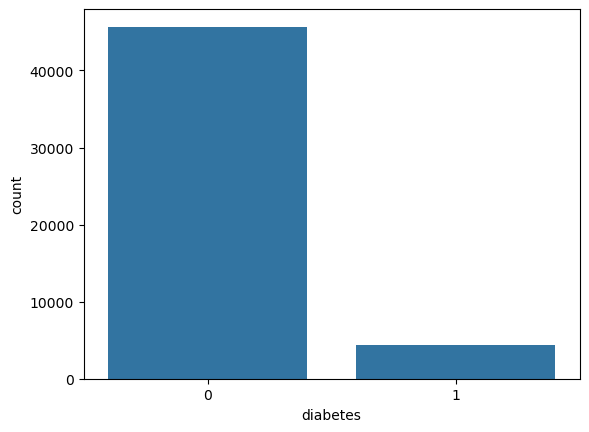

In [14]:
sns.countplot(data=df,x='diabetes')
plt.show()

In [15]:
df.duplicated().sum()

np.int64(1030)

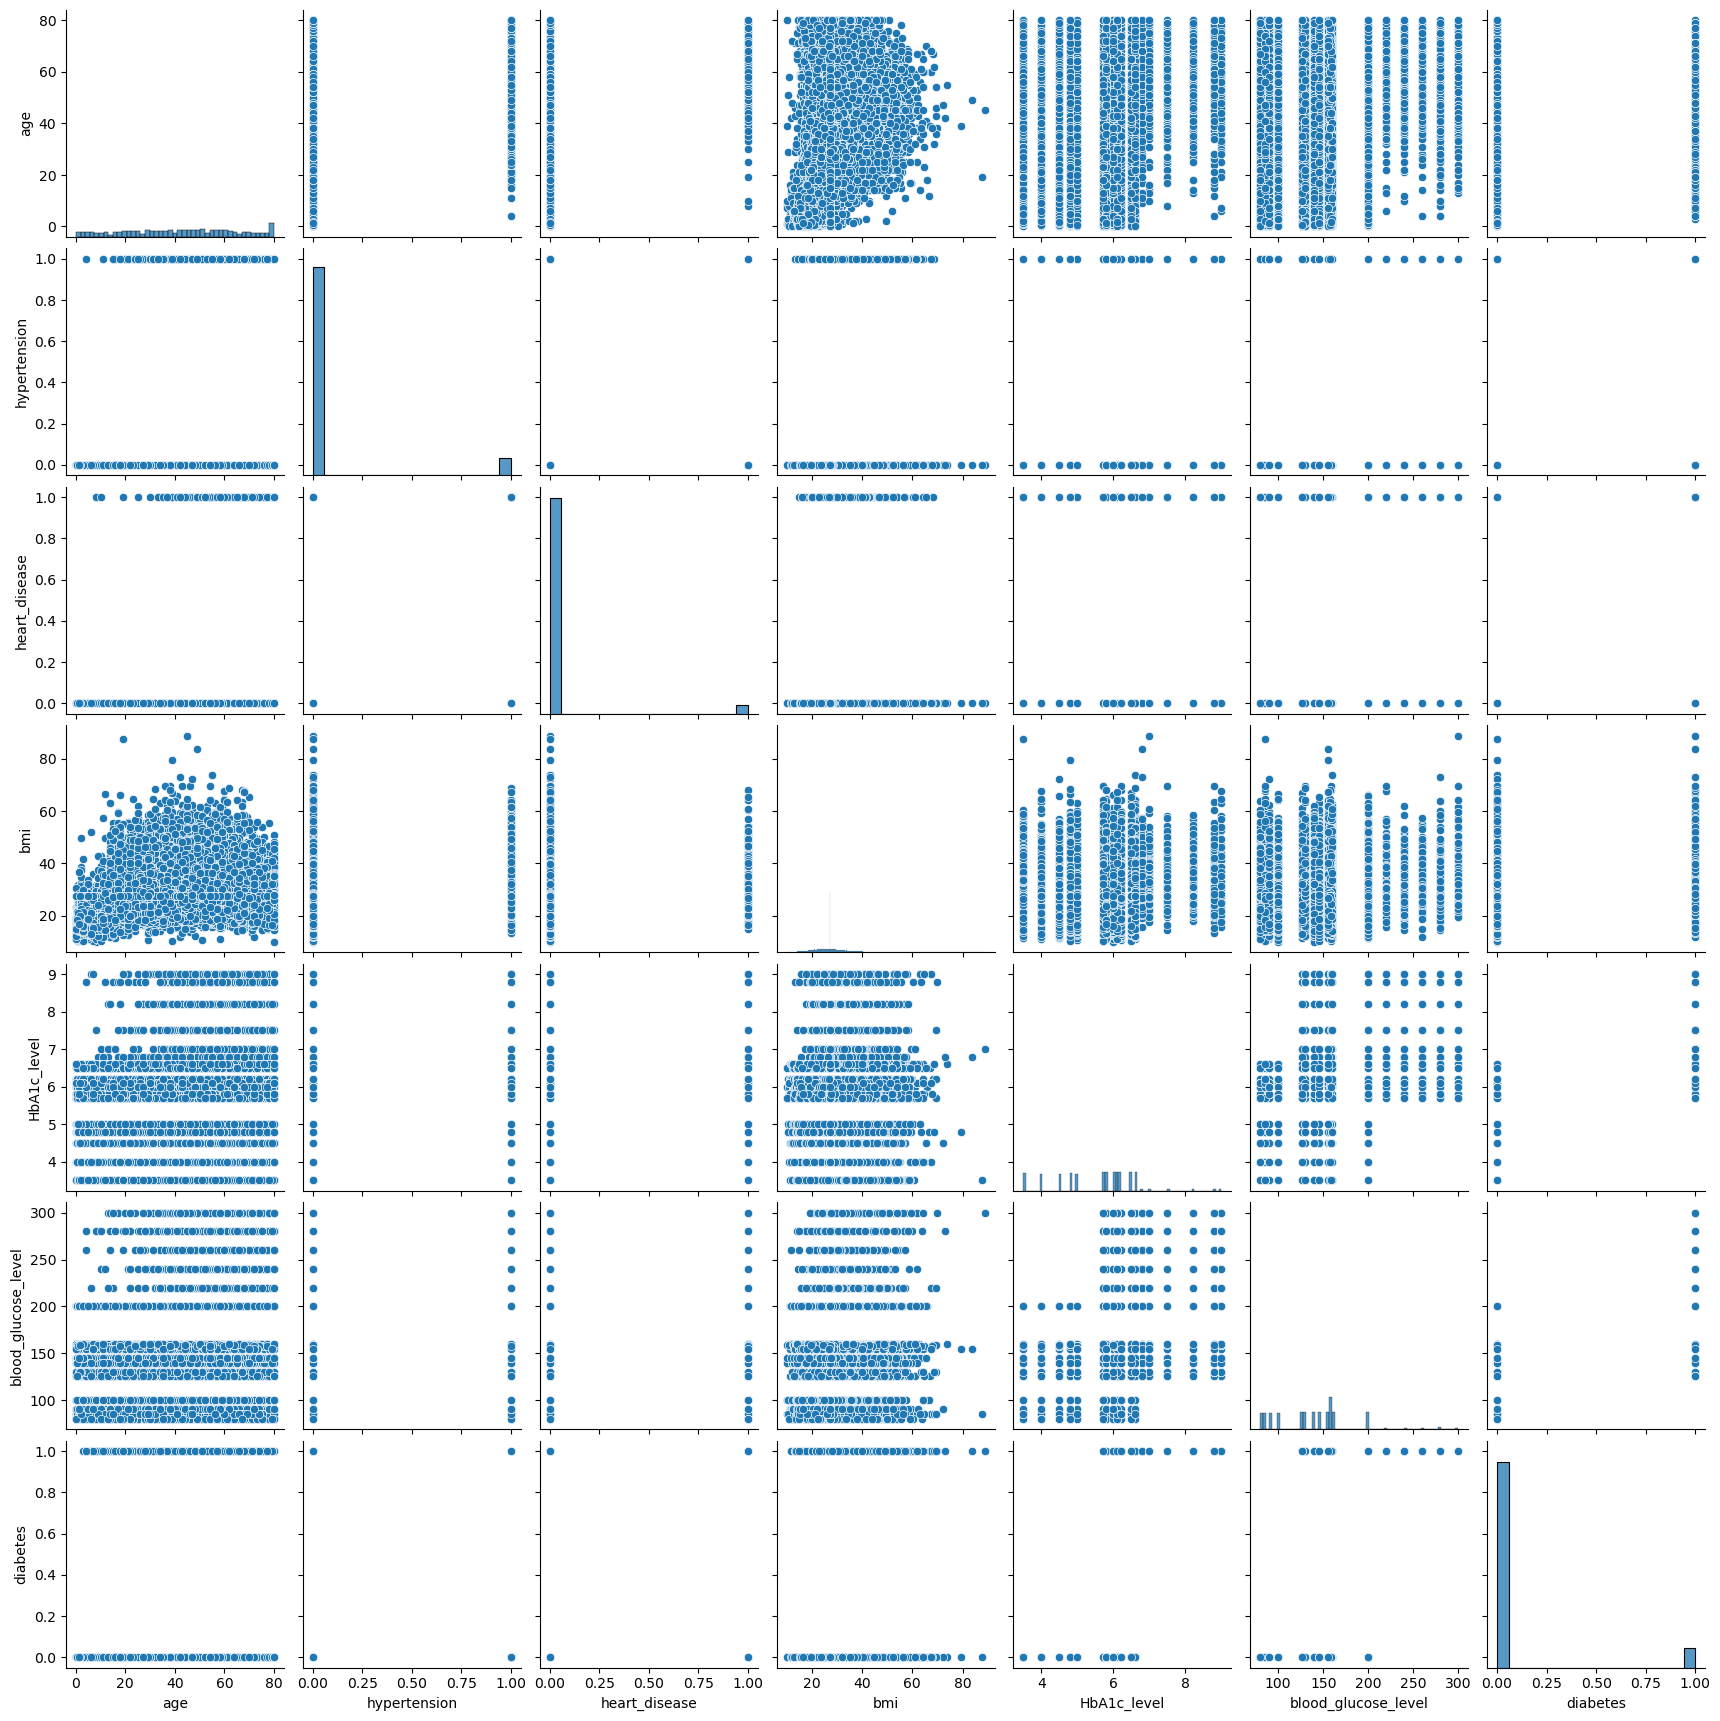

In [16]:
sns.pairplot(df)

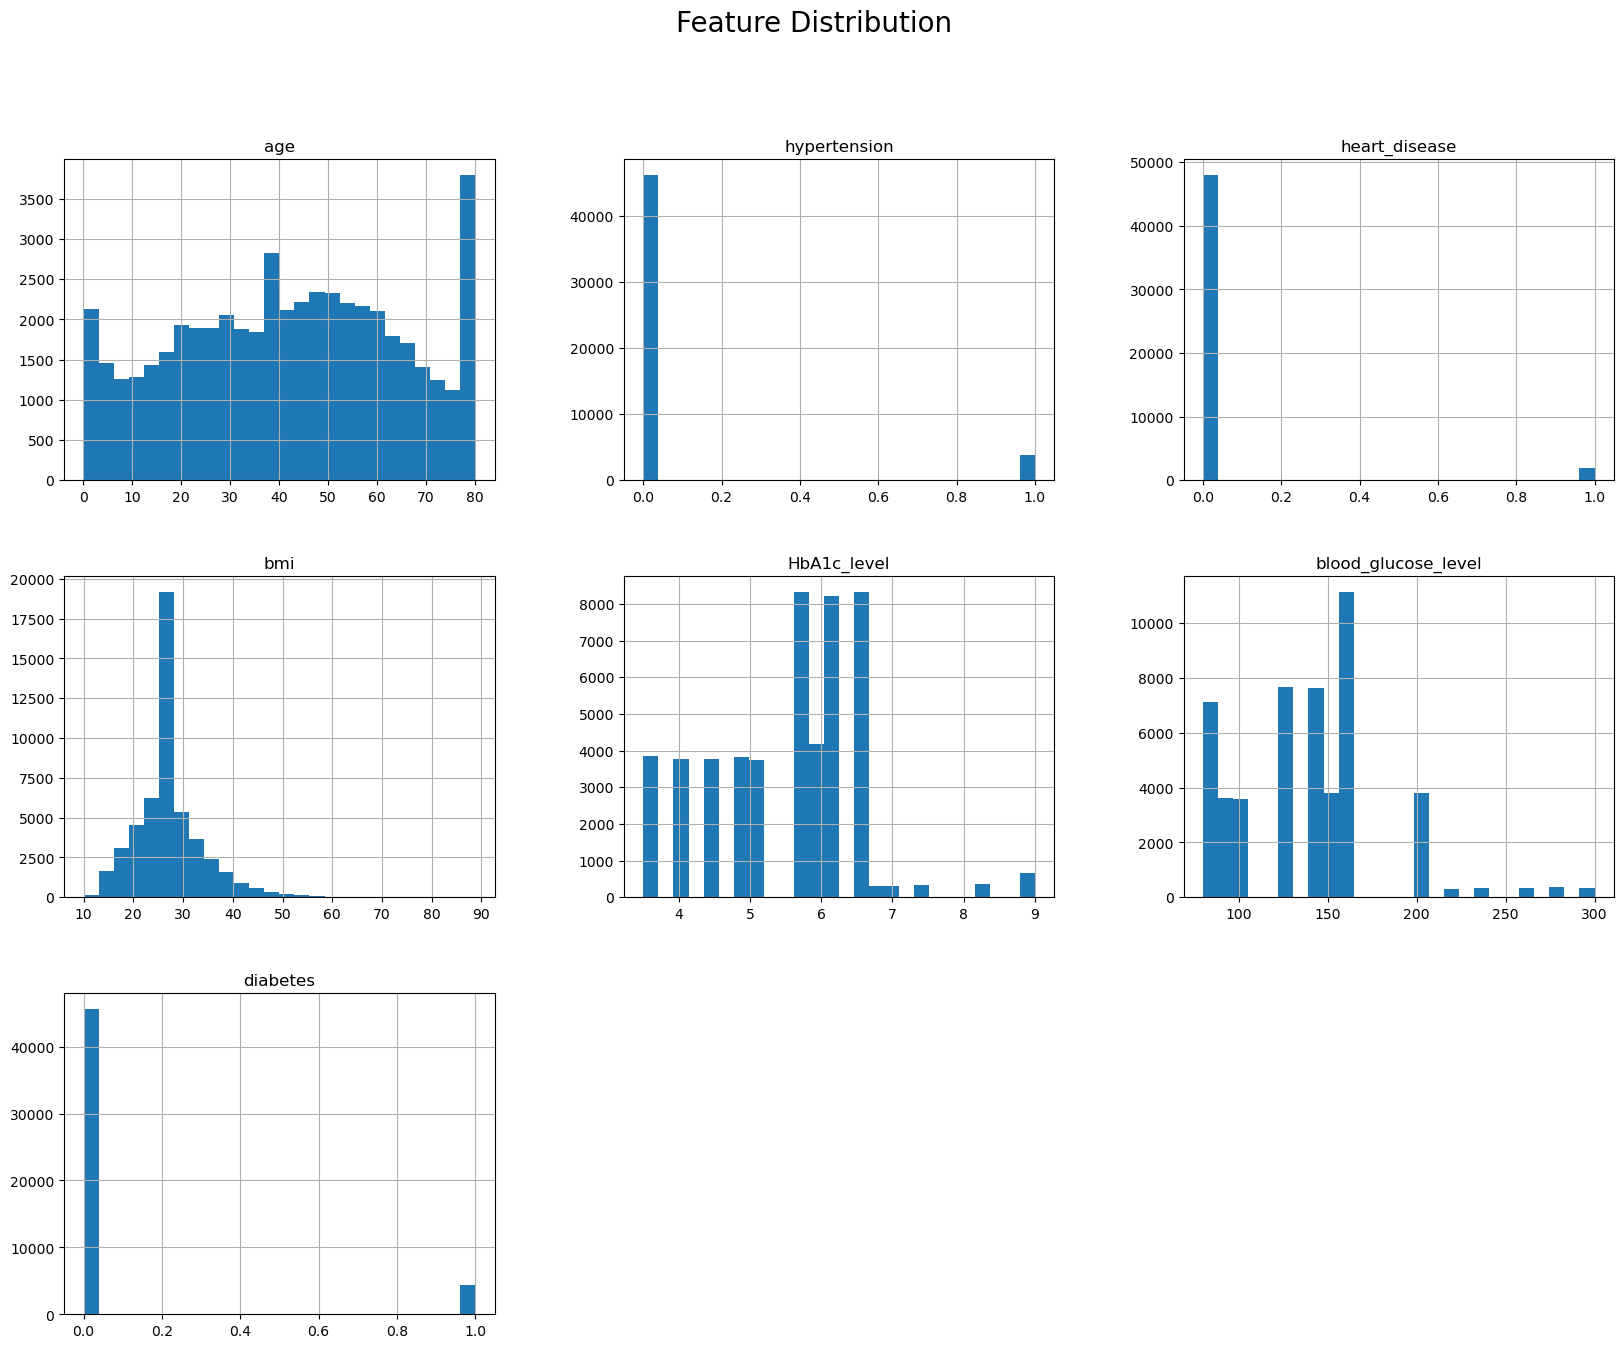

In [17]:
# HISTPLOT
df.hist(figsize=(20, 15), bins=26)
plt.suptitle("Feature Distribution", fontsize=20)
plt.show()

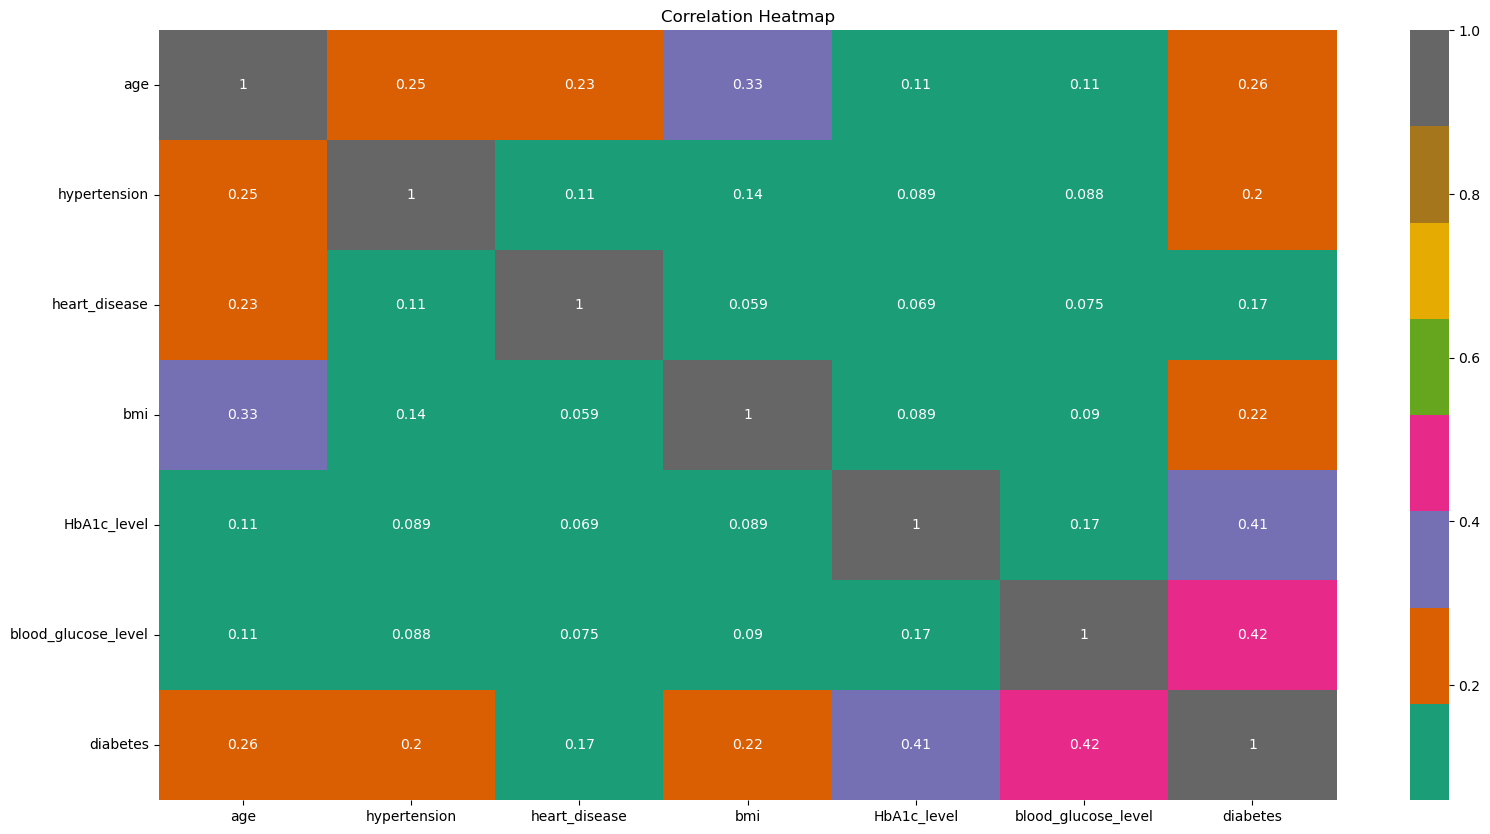

In [18]:
plt.figure(figsize=(19,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Dark2')
plt.title("Correlation Heatmap")
plt.show()

# PREPROCESSING

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
le0=LabelEncoder()

In [46]:
df['gender'] = le0.fit_transform(df['gender'])

In [47]:
le1=LabelEncoder()

In [48]:
df['smoking_history'] = le1.fit_transform(df['smoking_history'])

In [49]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.00,0,1,4,25.19,6.6,140,0
1,0,54.00,0,0,0,27.32,6.6,80,0
2,1,28.00,0,0,4,27.32,5.7,158,0
3,0,36.00,0,0,1,23.45,5.0,155,0
4,1,76.00,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
49994,1,70.00,0,0,4,26.81,6.2,155,0
49995,0,0.64,0,0,0,18.40,5.8,126,0
49996,0,1.32,0,0,0,16.74,5.8,90,0
49997,0,34.00,0,0,1,27.32,6.0,90,0


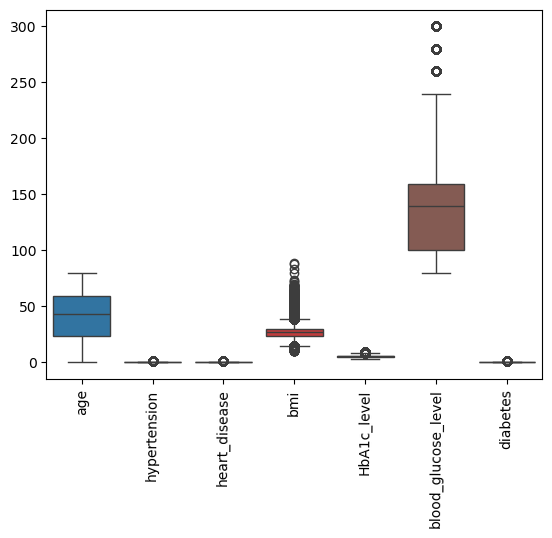

In [4]:
sns.boxplot(df)
plt.xticks(rotation=89.5)
plt.show()

In [51]:
import numpy as np

# List the features to cap
features_to_cap = ['age', 'bmi', 'blood_glucose_level', 'HbA1c_level']

for feature in features_to_cap:
    # 1. Calculate Q1, Q3, and IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # 2. Calculate the boundaries (Caps)
    upper_cap = Q3 + 1.5 * IQR
    lower_cap = Q1 - 1.5 * IQR
    
    # 3. Apply Capping
    # Replace values above the upper cap with the upper cap value
    df[feature] = np.where(df[feature] > upper_cap, upper_cap, df[feature])
    
    # Replace values below the lower cap with the lower cap value (if needed)
    df[feature] = np.where(df[feature] < lower_cap, lower_cap, df[feature])

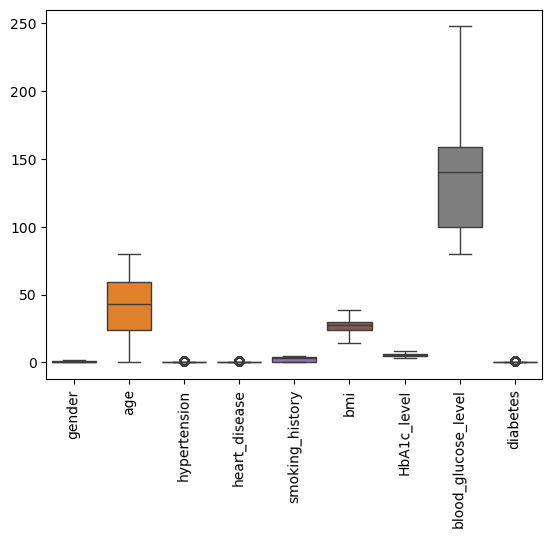

In [52]:
sns.boxplot(df)
plt.xticks(rotation=89.5)
plt.show()

In [53]:


y = df['diabetes']
x = df.drop('diabetes', axis=1)

In [54]:
y

0        0
1        0
2        0
3        0
4        0
        ..
49994    0
49995    0
49996    0
49997    0
49998    0
Name: diabetes, Length: 49999, dtype: int64

In [55]:
x

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.00,0,1,4,25.19,6.6,140.0
1,0,54.00,0,0,0,27.32,6.6,80.0
2,1,28.00,0,0,4,27.32,5.7,158.0
3,0,36.00,0,0,1,23.45,5.0,155.0
4,1,76.00,1,1,1,20.14,4.8,155.0
...,...,...,...,...,...,...,...,...
49994,1,70.00,0,0,4,26.81,6.2,155.0
49995,0,0.64,0,0,0,18.40,5.8,126.0
49996,0,1.32,0,0,0,16.74,5.8,90.0
49997,0,34.00,0,0,1,27.32,6.0,90.0


In [56]:
print(df['diabetes'].value_counts())

diabetes
0    45679
1     4320
Name: count, dtype: int64


In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=60, stratify=y)

In [58]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Before SMOTE:", Counter(y_train))

sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train)

print("After SMOTE:", Counter(y_train))

Before SMOTE: Counter({0: 34259, 1: 3240})
After SMOTE: Counter({0: 34259, 1: 34259})


In [59]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# LOGISTIC REGRESSION

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
lr=LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression()

In [62]:
lr_train = lr.score(x_train, y_train)
lr_test = lr.score(x_test, y_test)


In [63]:
lr_train

0.8922472926822149

In [64]:
lr_test

0.88688

In [65]:
y_pred=lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

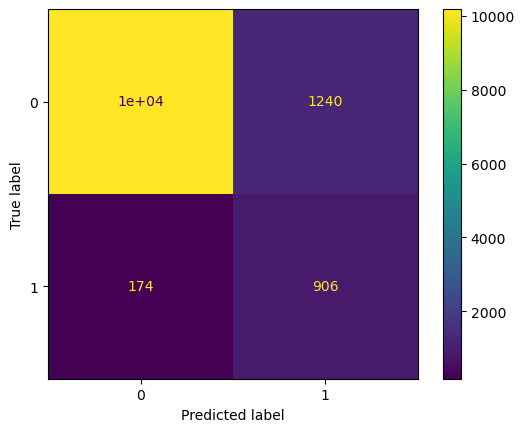

In [66]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))


In [89]:
print('CR:',classification_report(y_test,y_pred))

CR:               precision    recall  f1-score   support

           0       0.98      0.89      0.94     11420
           1       0.42      0.84      0.56      1080

    accuracy                           0.89     12500
   macro avg       0.70      0.87      0.75     12500
weighted avg       0.93      0.89      0.90     12500



# DECISION TREE




In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=60)

In [98]:
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [99]:
dt_train = dt.score(x_train, y_train)
dt_test = dt.score(x_test, y_test)


In [100]:
dt_train


0.9995733219552522

In [101]:
dt_test 

0.95232

In [103]:
y_pred=dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

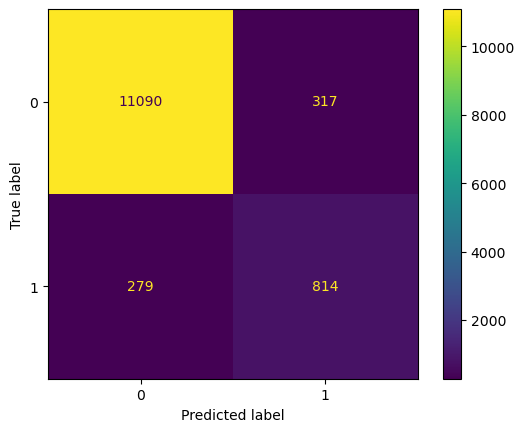

In [104]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))


In [105]:
print('CR:',classification_report(y_test,y_pred))

CR:               precision    recall  f1-score   support

           0       0.98      0.97      0.97     11407
           1       0.72      0.74      0.73      1093

    accuracy                           0.95     12500
   macro avg       0.85      0.86      0.85     12500
weighted avg       0.95      0.95      0.95     12500



# RANDOM FOREST

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
rf= RandomForestClassifier(n_estimators=50,random_state=20)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=20)

In [108]:
rf_train = rf.score(x_train, y_train)
rf_test = rf.score(x_test, y_test)


In [109]:
rf_train

0.9992533134216912

In [110]:
rf_test 

0.96896

In [111]:
y_pred=rf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

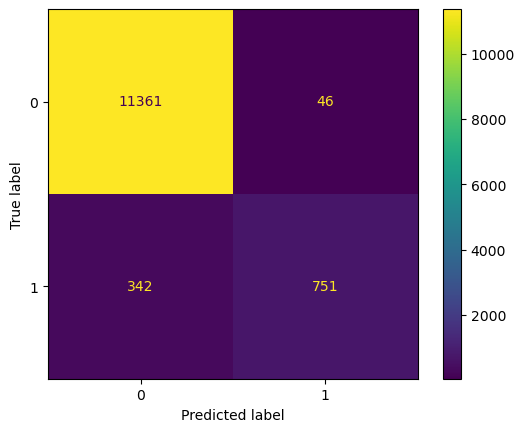

In [112]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))


In [113]:
print('CR:',classification_report(y_test,y_pred))

CR:               precision    recall  f1-score   support

           0       0.97      1.00      0.98     11407
           1       0.94      0.69      0.79      1093

    accuracy                           0.97     12500
   macro avg       0.96      0.84      0.89     12500
weighted avg       0.97      0.97      0.97     12500



# KNN  KNeighborsClassifier

In [114]:
from sklearn.neighbors import KNeighborsClassifier


In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=60)

In [116]:
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [117]:

knn_train = knn.score(x_train, y_train)
knn_test = knn.score(x_test, y_test)

In [118]:
knn_train

0.9610656284167578

In [119]:
knn_test

0.94912

In [120]:
y_pred=knn.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

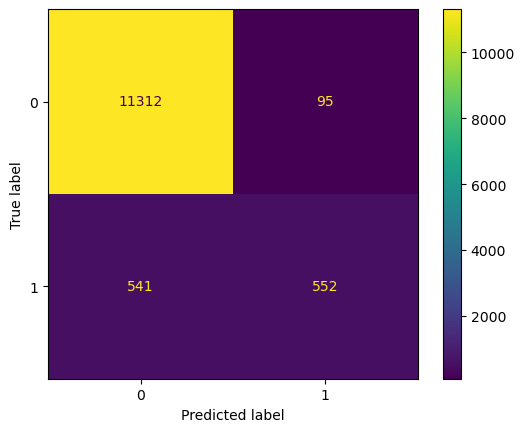

In [121]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))


In [122]:
print('CR:',classification_report(y_test,y_pred))

CR:               precision    recall  f1-score   support

           0       0.95      0.99      0.97     11407
           1       0.85      0.51      0.63      1093

    accuracy                           0.95     12500
   macro avg       0.90      0.75      0.80     12500
weighted avg       0.95      0.95      0.94     12500



# SUPPORT VECTOR MECHANISM (SVM)

In [169]:
from sklearn.svm import SVC

# linear kernal

In [170]:
svm=SVC(kernel='linear')


In [171]:
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [172]:
svm_test=svm.score(x_test,y_test)
svm_train=svm.score(x_train,y_train)

In [173]:
svm_train

0.9593589162377664

In [174]:
svm_test

0.9592

# Polynomial Kernel

In [175]:

svm1 = SVC(kernel='poly')
svm1.fit(x_train, y_train)


SVC(kernel='poly')

In [176]:
svm1.score(x_train,y_train)

0.9495186538307688

In [177]:
svm1.score(x_test,y_test)

0.95

# sigmoid

In [178]:
svm_sig=SVC(kernel='sigmoid')
svm_sig.fit(x_train,y_train)


SVC(kernel='sigmoid')

In [179]:
svm_sig.score(x_train,y_train)

0.9080242139790394

In [180]:
svm_sig.score(x_test,y_test)

0.90544

# NAIVE BAYES (GaussianNB)

In [123]:
from sklearn.naive_bayes import GaussianNB

In [124]:
nb=GaussianNB()

In [125]:
nb.fit(x_train,y_train)

GaussianNB()

In [126]:
nb_train = nb.score(x_train, y_train)
nb_test = nb.score(x_test, y_test)

In [127]:
nb_train

0.90466412437665

In [128]:
nb_test

0.9004

In [129]:
y_pred=nb.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

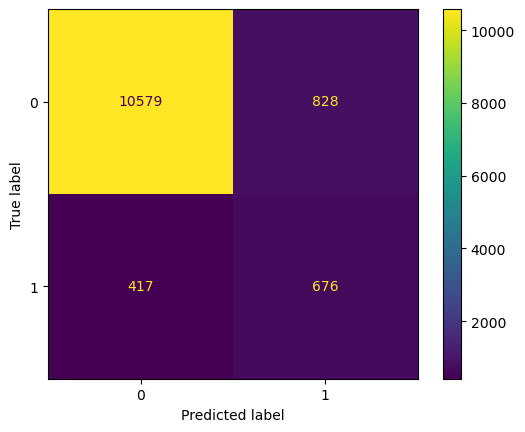

In [130]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))


# ENSEMBLE MODEL

# ADABOOST


In [131]:
from sklearn.ensemble import AdaBoostClassifier

In [132]:
adaBoost=AdaBoostClassifier(n_estimators=50,learning_rate=0.3,random_state=1)

In [133]:
adaBoost.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.3, random_state=1)

In [134]:
ada_train = adaBoost.score(x_train, y_train)
ada_test = adaBoost.score(x_test, y_test)

In [135]:
ada_train

0.9693591829115443

In [136]:
ada_test

0.96992

In [146]:
y_pred=adaBoost.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

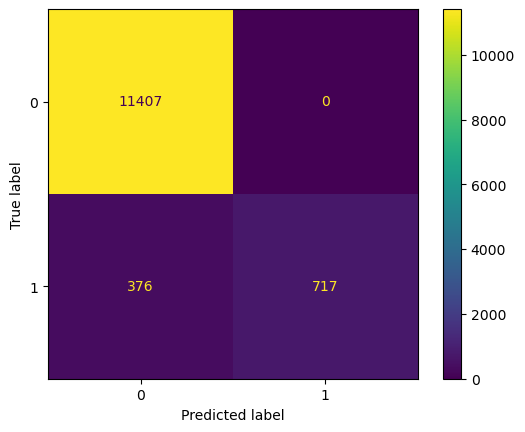

In [147]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

# Gradient Boosting

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
gcb=GradientBoostingClassifier(n_estimators=600,learning_rate=0.05,random_state=100)
gcb.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=600,
                           random_state=100)

In [69]:
gcb_train = gcb.score(x_train, y_train)
gcb_test = gcb.score(x_test, y_test)

In [75]:
gcb_train

0.9766776613444642

In [76]:
gcb_test

0.96624

In [72]:
y_pred=gcb.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

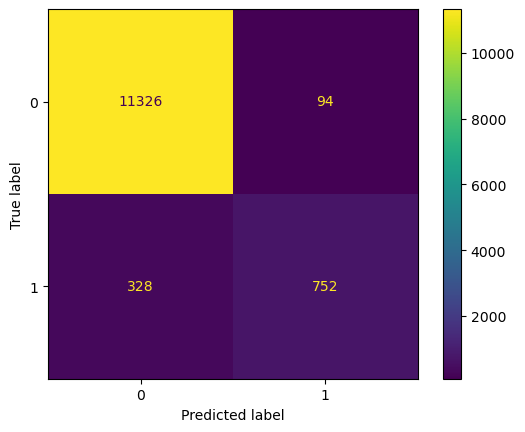

In [73]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [74]:
print('CR:',classification_report(y_test,y_pred))

CR:               precision    recall  f1-score   support

           0       0.97      0.99      0.98     11420
           1       0.89      0.70      0.78      1080

    accuracy                           0.97     12500
   macro avg       0.93      0.84      0.88     12500
weighted avg       0.96      0.97      0.96     12500



# XGBoost (Extreme Gradient Boosting)

In [77]:

from xgboost import XGBClassifier


In [78]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [79]:

xgb_train = xgb.score(x_train, y_train)
xgb_test = xgb.score(x_test, y_test)

In [80]:
xgb_train

0.9840917715052979

In [81]:
xgb_test

0.96264

In [82]:
y_pred=xgb.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

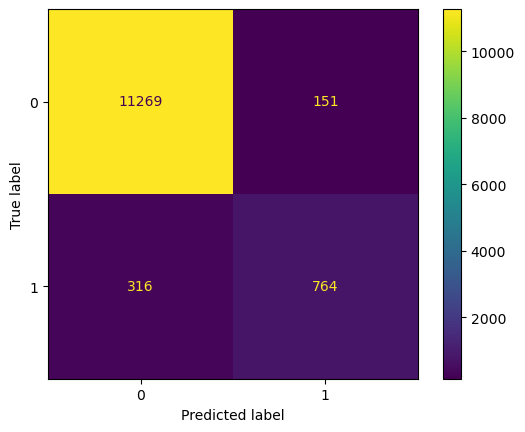

In [83]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [37]:
print('CR:',classification_report(y_test,y_pred))

CR:               precision    recall  f1-score   support

           0       0.98      0.89      0.94     11420
           1       0.42      0.84      0.56      1080

    accuracy                           0.89     12500
   macro avg       0.70      0.87      0.75     12500
weighted avg       0.93      0.89      0.90     12500



In [181]:
tb = pd.DataFrame()
tb['model'] = ['lr','dt','rf','knn','svm','nb','adaBoost','gcb','xgb']
tb['test_accuracy'] = [lr_test, dt_test, rf_test, knn_test, svm_test, nb_test, ada_test, gcb_test, xgb_test]
tb['train_accuracy'] = [lr_train, dt_train, rf_train, knn_train, svm_train, nb_train, ada_train, gcb_train, xgb_train]
tb


,model,test_accuracy,train_accuracy
0,lr,0.88688,0.892247
1,dt,0.95232,0.999573
2,rf,0.96896,0.999253
3,knn,0.94912,0.961066
4,svm,0.95920,0.959359
5,nb,0.90040,0.904664
6,adaBoost,0.96992,0.969359
7,gcb,0.97040,0.973439
8,xgb,0.96952,0.977653


# HYPERPARAMETER TUNNING

In [183]:
# LOGITIC REGRESSION
# ----------------------
ir_params={'C':[0.1,1,10]}
ir_grid=GridSearchCV(LogisticRegression(),ir_params,cv=5)
ir_grid.fit(x_train,y_train)                                            


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10]})

In [186]:
# DECISION TREE
# ------------------
dt_params={'max_depth':[2,4,6,None],'criterion':['gini','entropy']}
dt_grid=GridSearchCV(DecisionTreeClassifier(random_state=42),dt_params,cv=5)
dt_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, None]})

In [47]:
# RANDOM FOREST
# ------------------
rf_params={'n_estimators':[10,50,100],'max_depth':[2,4,6,None]}
rf_grid=GridSearchCV(RandomForestClassifier(random_state=42),rf_params,cv=5)
rf_grid.fit(x_train,y_train)
           

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, None],
                         'n_estimators': [10, 50, 100]})

In [43]:
# KNN
knn_param = {
    'n_neighbors':range(1, 31),  # Number of neighbors
    'weights':['uniform','distance'],  # Voting strategy
    'metric':['euclidean','manhattan','minkowski']  # Distance metric
}
knn_grid= GridSearchCV(knn,knn_param,cv=5,scoring='accuracy', n_jobs=-1)
knn_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [21]:
# SVM
# -------
svm_params={'C':[0.1,1,10],'kernel':['linear','rbf'],'gamma':['scale','auto']}
svm_grid=GridSearchCV(SVC(),svm_params,cv=5)
svm_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [188]:
gb_param = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5]}
gb_grid = GridSearchCV(GradientBoostingClassifier(),gb_param,cv=5,scoring='accuracy',n_jobs=-1)
gb_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [189]:
models = {'Logistic Regression': ir_grid,
          'Decision Tree': dt_grid,
          'Random Forest': rf_grid,
          'KNN':knn_grid,
          'SVM': svm_grid,
          'GB':gb_grid }
for name, grid in models.items():
    best_model = grid.best_estimator_
    y_pred = best_model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}:")
    print(f"  Best Params: {grid.best_params_}")
    print(f"  Accuracy: {acc:.4f}\n")

Logistic Regression:
  Best Params: {'C': 0.1}
  Accuracy: 0.9560

Decision Tree:
  Best Params: {'criterion': 'gini', 'max_depth': 2}
  Accuracy: 0.9714

Random Forest:
  Best Params: {'max_depth': 4, 'n_estimators': 10}
  Accuracy: 0.9714

KNN:
  Best Params: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
  Accuracy: 0.9484

SVM:
  Best Params: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
  Accuracy: 0.9126

GB:
  Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}
  Accuracy: 0.9709



In [50]:
# Access the best model
best_gcb_model = gb_grid.best_estimator_
y_pred = best_gcb_model.predict(x_test)


In [51]:
print(best_gcb_model)

GradientBoostingClassifier(max_depth=5, min_samples_split=5, n_estimators=200)


# joblib

In [6]:
import joblib

In [50]:

joblib.dump(gcb, "diabetes.pkl")

['diabetes.pkl']

In [121]:
joblib.dump(sc,"scaler.pkl")

['scaler.pkl']

In [122]:
joblib.dump(le0,"le0.pkl")


['le0.pkl']

In [123]:
joblib.dump(le1,"le1.pkl")


['le1.pkl']